In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy import special
from mpl_toolkits.mplot3d import Axes3D
# import sys
# print(sys.executable) -- prints python environment path
# print(sys.version) -- prints python environment version 

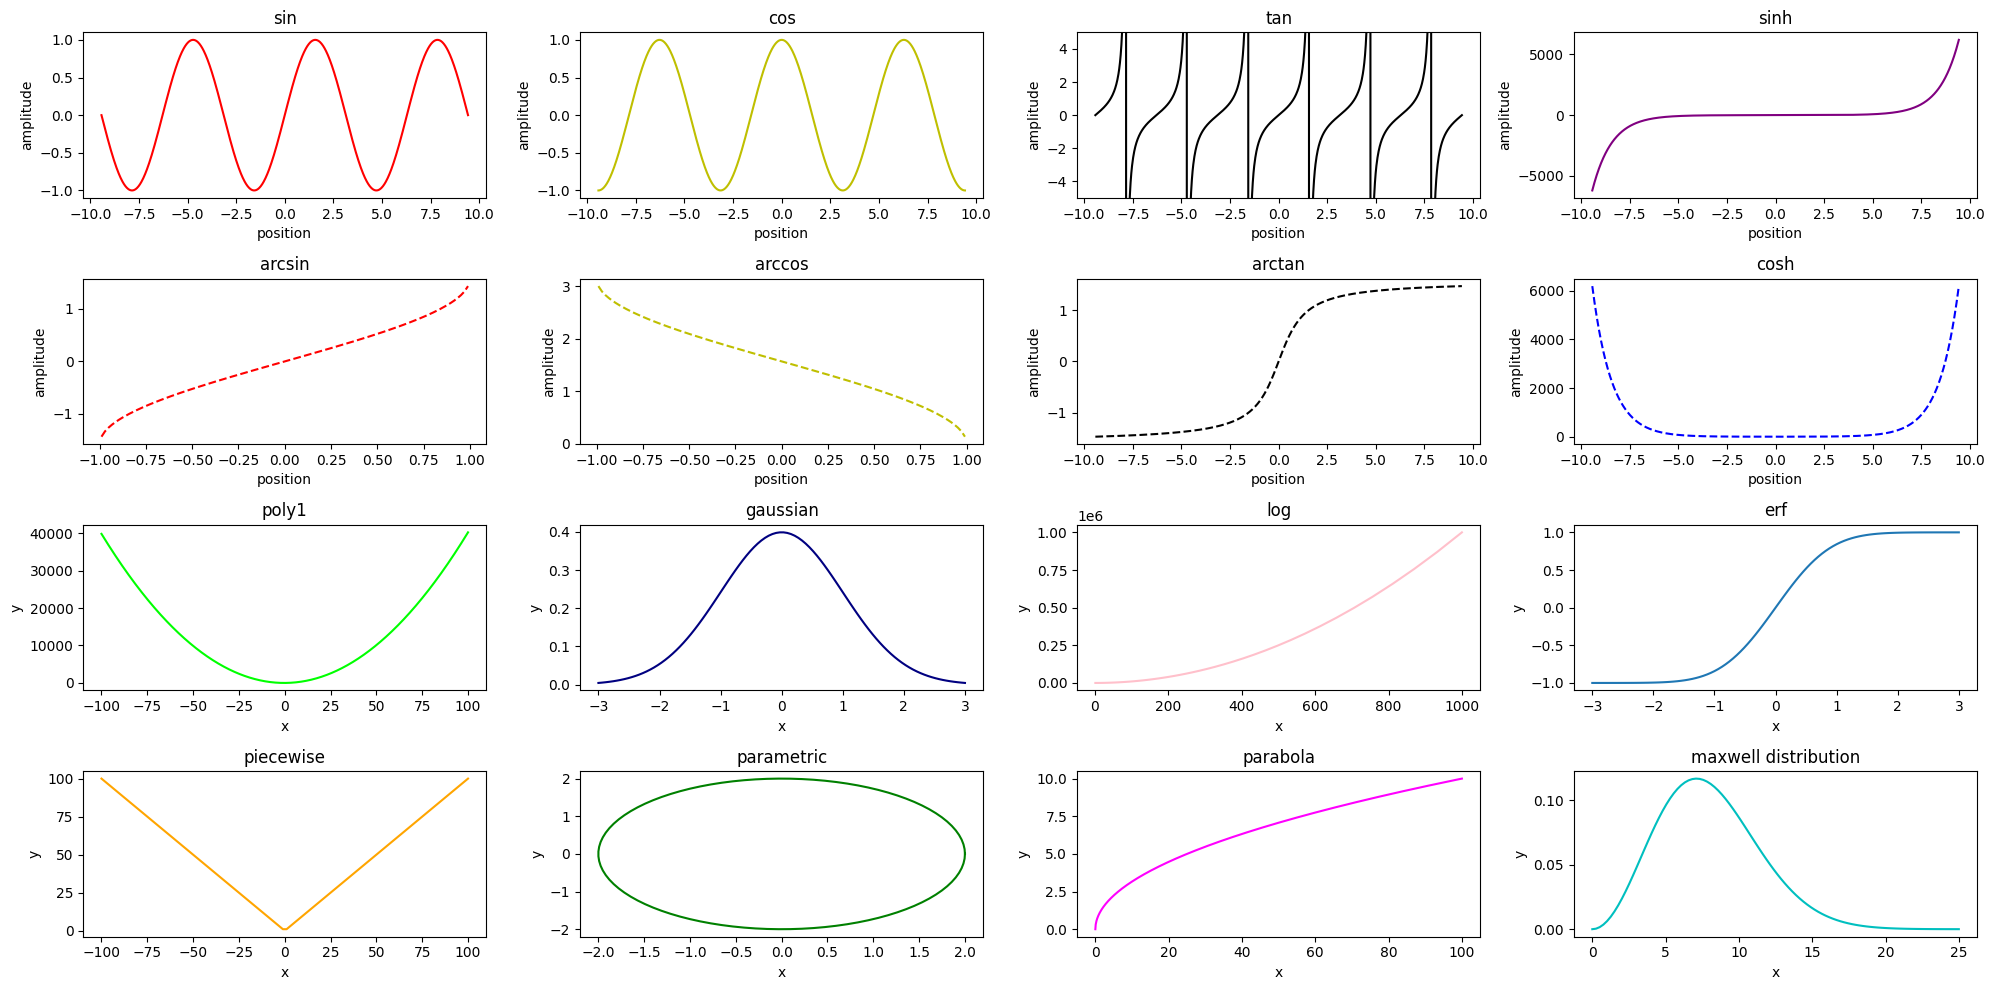

In [9]:
def PolyCoefficients(x, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

x = np.linspace(-3*np.pi, 3*np.pi, 1000)

# row 1
sin = np.sin(x)
cos = np.cos(x)
tan = np.tan(x)
sinh = np.sinh(x)

# row 2
arc_x = np.where(np.abs(x) <= 1, x, np.nan) 

arcsin = np.arcsin(arc_x)
arccos = np.arccos(arc_x)
arctan = np.arctan(x)
cosh = np.cosh(x)

# row 3
poly_x = np.linspace(-100, 100, 1000)
coeffs = [3, 2, 4]

mu = 0
variance = 1
sigma = math.sqrt(variance)
gaussian_x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

erf_x = np.linspace(-3, 3, 100)

log_x = np.logspace(0, 3, 100)

poly1 = PolyCoefficients(poly_x, coeffs)
gaussian = stats.norm.pdf(gaussian_x, mu, sigma)
log = log_x**2
erf = special.erf(erf_x)

# row 4
piecewise_x = np.linspace(-100, 100, 100)
piecewise = np.abs(piecewise_x)

para_x = np.linspace(0, 2 * np.pi, 100) 
radius = 2
para_x2 = radius * np.cos(para_x)
para = radius * np.sin(para_x)

parabola_x = np.linspace(0, 100, 1000)
parabola = np.sqrt(parabola_x)

maxwell = stats.maxwell
data = maxwell.rvs(loc=0, scale=5, size=10000)
params = maxwell.fit(data, floc=0)
maxwell_x = np.linspace(0, 25, 100)
maxwell_y = maxwell.pdf(maxwell_x, *params)

fig, ax = plt.subplots(4, 4, figsize=(20, 10))

def plotFunk(plot, x, y, xlabel, ylabel, title, style="", limits=False):
    ax[*plot].plot(x, y, style)
    ax[*plot].set(xlabel=xlabel, ylabel=ylabel, title=title)
    if limits:
        ax[plot[0], plot[1]].set_ylim(-5, 5)

plotFunk([0, 0], x, sin,                    "position", "amplitude", "sin", "r")
plotFunk([0, 1], x, cos,                    "position", "amplitude", "cos", "y")
plotFunk([0, 2], x, tan,                    "position", "amplitude", "tan", "k", True)
plotFunk([0, 3], x, sinh,                   "position", "amplitude", "sinh", "purple")

plotFunk([1, 0], x, arcsin,                 "position", "amplitude", "arcsin", "r--")
plotFunk([1, 1], x, arccos,                 "position", "amplitude", "arccos", "y--")
plotFunk([1, 2], x, arctan,                 "position", "amplitude", "arctan", "k--")
plotFunk([1, 3], x, cosh,                   "position", "amplitude", "cosh", "b--")

plotFunk([2, 0], poly_x, poly1,             "x", "y", "poly1", "lime")
plotFunk([2, 1], gaussian_x, gaussian,      "x", "y", "gaussian", "navy")
plotFunk([2, 2], log_x, log,                "x", "y", "log", "pink")
plotFunk([2, 3], erf_x, erf,                "x", "y", "erf")

plotFunk([3, 0], piecewise_x, piecewise,    "x", "y", "piecewise", "orange")
plotFunk([3, 1], para_x2, para,             "x", "y", "parametric", "green")
plotFunk([3, 2], parabola_x, parabola,      "x", "y", "parabola", "magenta")
plotFunk([3, 3], maxwell_x, maxwell_y,      "x", "y", "maxwell distribution", "c")

plt.tight_layout()
plt.show()
